# Modelo de Regresión Lineal
Este notebook carga un dataset con características meteorológicas para predecir la temperatura máxima diaria usando regresión lineal.

In [125]:
# Cargar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [126]:
def dayDesc (day):
    return [np.sin(2 * np.pi * day / 365),np.cos(2 * np.pi * day / 365)]

In [127]:
# Cargar dataset
df = pd.read_csv('./data/temperature_dataset.csv')
df.head()

,day_of_year,humidity,pressure,rain,temperature
0,1,73,1019.5,0,20.0
1,2,68,1013.5,0,23.3
2,3,70,1019.0,0,22.5
3,4,64,1017.2,0,22.9
4,5,74,1014.1,0,23.6


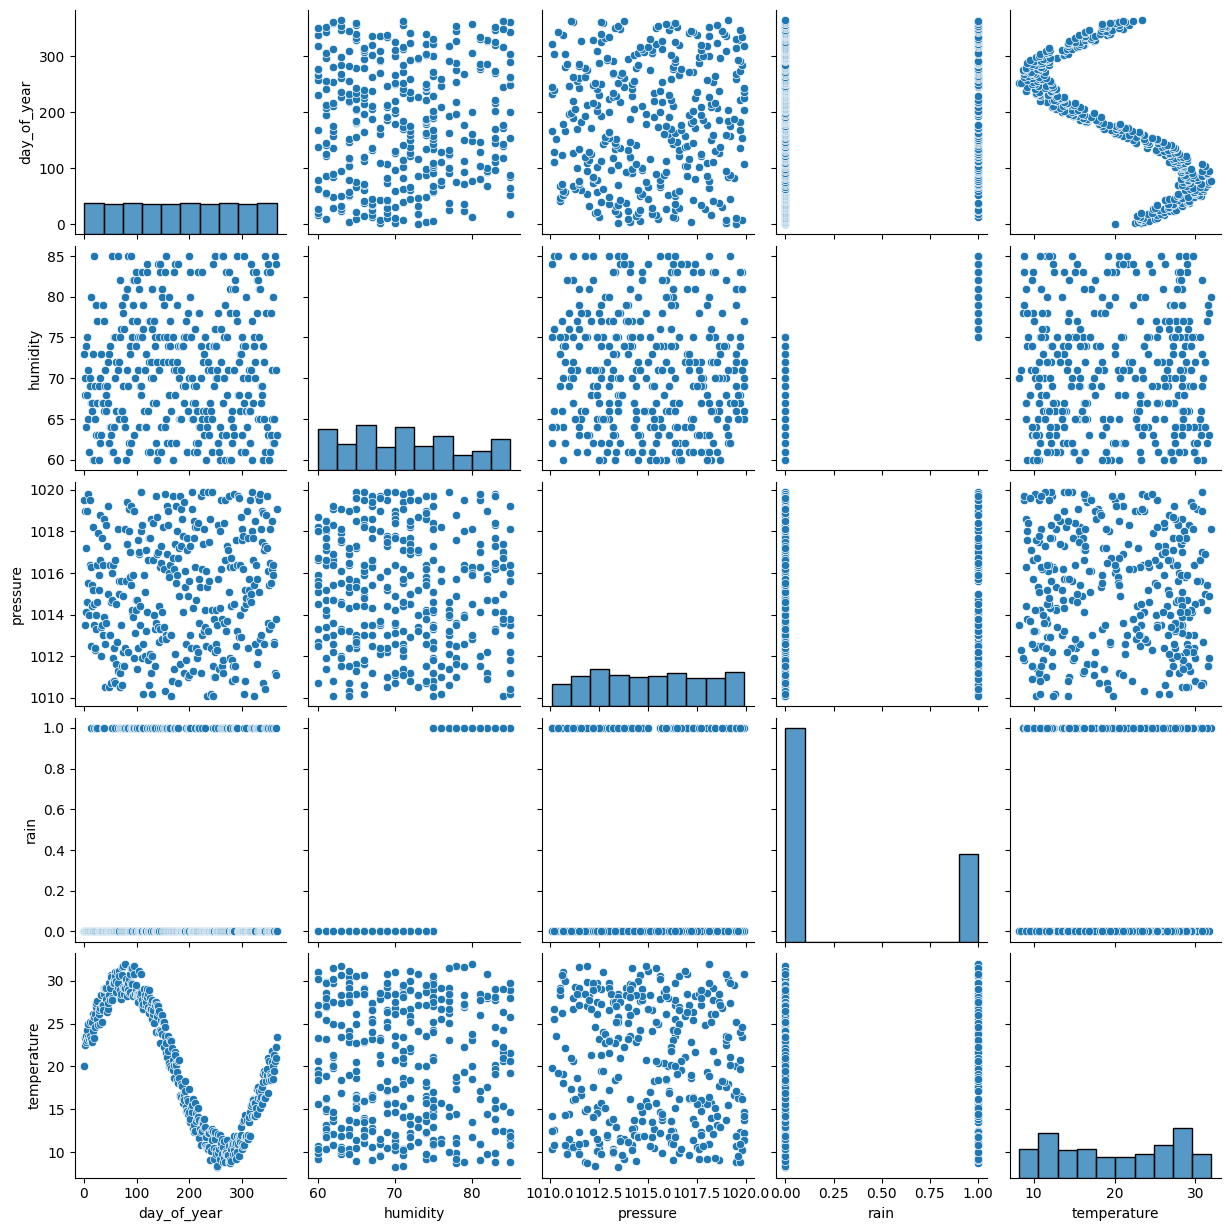

In [128]:
# Visualización rápida
sns.pairplot(df)
plt.show()

In [129]:
df['day_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
df['day_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365)
# Separar features y target
X = df[['day_sin', 'day_cos', 'humidity', 'pressure', 'rain']]
y = df['temperature']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [130]:
# Entrenar modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [131]:
# Predicciones
y_pred = model.predict(X_test)

# Métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R²: {r2:.2f}')

MSE: 1.35
MAE: 0.99
R²: 0.97


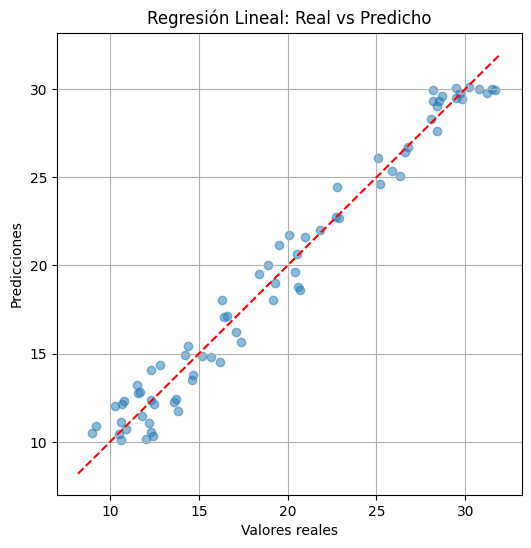

In [132]:
# Visualización de resultados
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal: Real vs Predicho")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.grid(True)
plt.show()

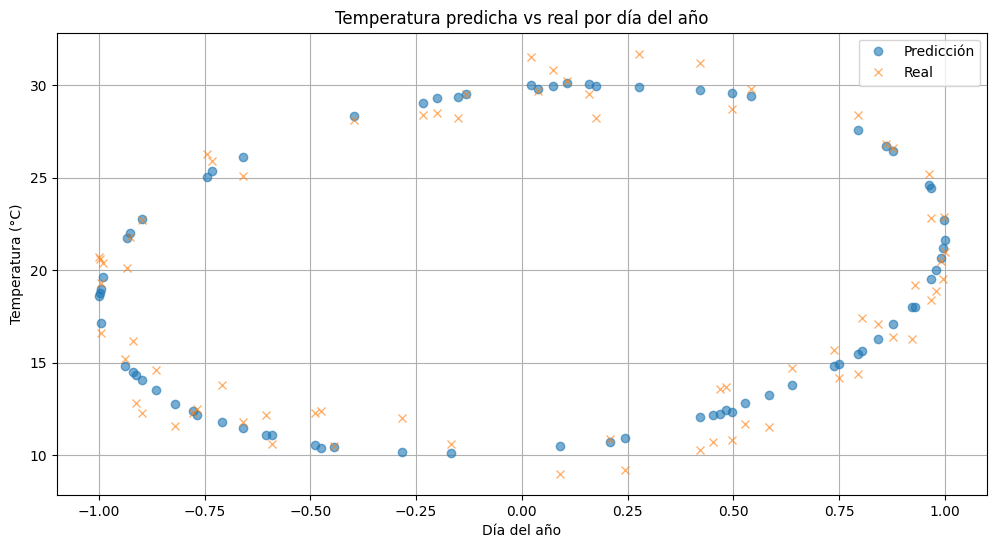

In [133]:
# Visualización: predicción vs día del año
plt.figure(figsize=(12,6))
plt.plot(X_test['day_cos'], y_pred, 'o', label='Predicción', alpha=0.6)
plt.plot(X_test['day_cos'], y_test, 'x', label='Real', alpha=0.6)
plt.xlabel("Día del año")
plt.ylabel("Temperatura (°C)")
plt.title("Temperatura predicha vs real por día del año")
plt.legend()
plt.grid(True)
plt.show()


In [138]:
day = dayDesc(90)
model.predict([[day[0],day[1],50,1011,0]])


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([30.13004227])